In [1]:
import mne
from mne import io

from mne.io import read_raw_edf
import numpy as np
# 数据可视化包
import matplotlib.pyplot as plt


In [2]:
test001 = read_raw_edf("./data/H S1 EC.edf",preload = True)


Extracting EDF parameters from c:\Users\14251\Desktop\补充材料\data\H S1 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


In [3]:
print(test001)
test001_df = test001.to_data_frame()
print(test001.ch_names)

<RawEDF | H S1 EC.edf, 22 x 76800 (300.0 s), ~12.9 MB, data loaded>
['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']


In [4]:
##查看info属性，info是更详细的属性
test001.info
test001.plot()

Using qt as 2D backend.


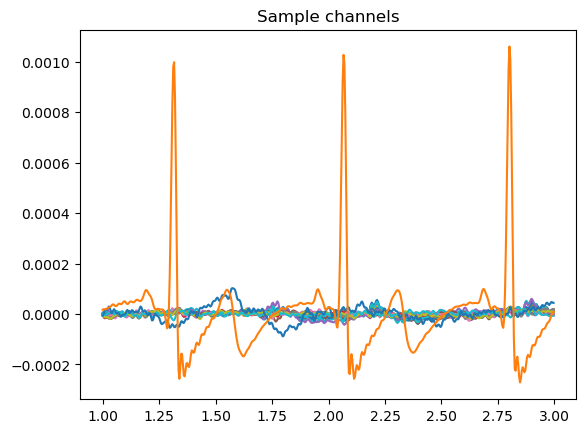

In [5]:
###查看原始22通道的数据,并且用时间作为索引
picks = mne.pick_types(test001.info, eeg=True, exclude='bads')
#picks = mne.pick_types(test001.info, eeg=True, exclude='bads',selection=('EEG Fp1-LE'))
t_idx = test001.time_as_index([1.,3.])
data, times = test001[picks, t_idx[0]:t_idx[1]]
plt.plot(times,data.T)
plt.title("Sample channels")
plt.show()


In [6]:
#####进行带通滤波
original = test001.copy()
alpha = test001.filter( l_freq=8, h_freq=13, picks=None, filter_length='auto',
               l_trans_bandwidth='auto', h_trans_bandwidth='auto', n_jobs=None,
               method='fir', iir_params=None, phase='zero',
               fir_window='hamming', fir_design='firwin',
               skip_by_annotation=('edge', 'bad_acq_skip'),
               pad='reflect_limited', verbose=None)
#alpha = alpha.notch_filter(freqs=50)
alpha.plot()
print(type(alpha))
alpha_df = alpha.to_data_frame()
print(type(alpha_df))
print(alpha_df.shape)



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 423 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<class 'mne.io.edf.edf.RawEDF'>
<class 'pandas.core.frame.DataFrame'>
(76800, 23)


In [7]:
original.plot()
alpha.plot()

In [8]:
#########fft
# print(data.shape)
# y_fft = np.fft.fft(data)
# print(type(y_fft))
# print(y_fft.shape)
# plt.plot(times,y_fft[0,:])
# plt.show()

Effective window size : 8.000 (s)
(22, 237)


C:\Users\14251\AppData\Local\Temp\ipykernel_4588\505164399.py:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  the_original_psd.plot()
c:\Users\14251\anaconda3\envs\mne_analysis\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 5.9s.
Creating RawArray with float64 data, n_channels=10, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
Channels marked as bad:
none
Attempting to create new mne-python configuration file:
C:\Users\14251\.mne\mne-python.json
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


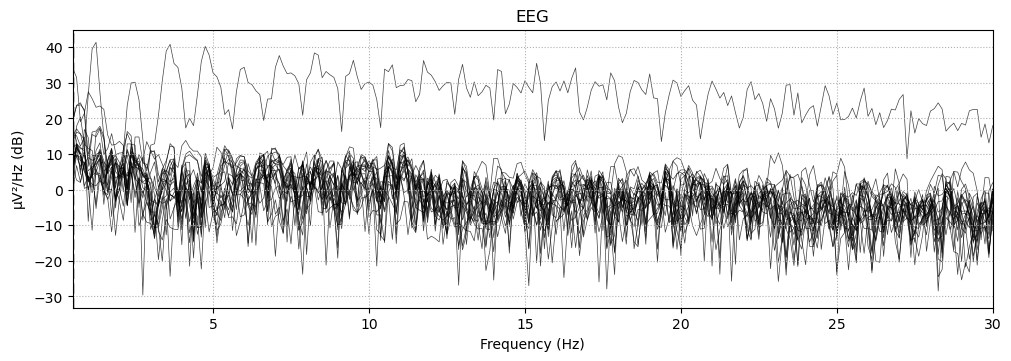

In [9]:
#####在物理学中，信号通常是波的形式表示，例如电磁波、随机振动或者声波。
#当波的功率频谱密度乘以一个适当的系数后将得到每单位频率波携带的功率，这被称为信号的功率谱密度（power spectral density, PSD）
###ICA是独立成分分析
###查看原信号的PSD
the_original_psd = original.compute_psd(method='welch',tmin=10, tmax=20, fmin=0.5, fmax=30, picks=None)
original_psd_data = the_original_psd.get_data()
print(original_psd_data.shape)
the_original_psd.plot()

####原信号的ICA

ica = mne.preprocessing.ICA(n_components=10)
ica.fit(original)
original.load_data()
ica.plot_sources(original,show_scrollbars=True,block=True,title="选择去除的成分")


Effective window size : 8.000 (s)
(22, 237)
Fitting ICA to data using 22 channels (please be patient, this may take a while)


C:\Users\14251\AppData\Local\Temp\ipykernel_4588\3909341501.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  the_alpha_psd.plot()
c:\Users\14251\anaconda3\envs\mne_analysis\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Selecting by number: 10 components
Fitting ICA took 1.1s.
Creating RawArray with float64 data, n_channels=10, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.


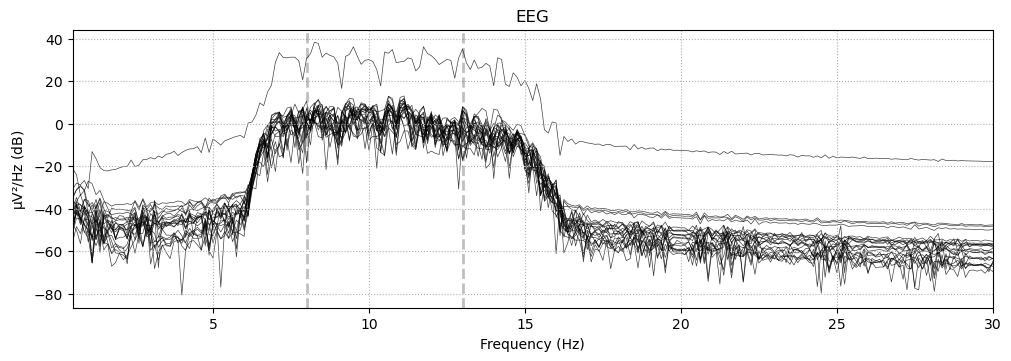

In [10]:
####alpha波的PSD和ICA


the_alpha_psd = alpha.compute_psd(method='welch',tmin=10, tmax=20, fmin=0.5, fmax=30, picks=None)
alpha_psd_data = the_alpha_psd.get_data()
print(alpha_psd_data.shape)
the_alpha_psd.plot()



ica = mne.preprocessing.ICA(n_components=10)
ica.fit(alpha)
alpha.load_data()
ica.plot_sources(alpha,show_scrollbars=True,block=True,title="选择去除的成分")